In [1]:
import numpy as np
from dist_analy import dist_analy
from prody.atomic import Atomic, Residue, Atom
from prody.proteins import pdbfile
from prody.measure import buildDistMatrix
from prody.utilities import getDistance
from prody.database.uniprot import queryUniprot ### this can be useful
from prody.utilities import openURL
import matplotlib.pyplot as plt
from timeit import time

from pypdb import *
from prody import *

import Bio
print(Bio.__version__)

%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


1.78


## testing query for PDB

In [27]:
import requests as re
search_api_url = 'https://search.rcsb.org/rcsbsearch/v1/query?json='

search = {
  "query": {
    "type": "group",
    "logical_operator": "and",
    "nodes": [
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "P24941",
          "attribute": "rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_accession"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "UniProt",
          "attribute": "rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_name"
        }
      }
    ]
  },
    "request_options": {
    "return_all_hits": True},
  "return_type": "polymer_entity"
}

"https://search.rcsb.org/rcsbsearch/v1/query?json=%7B%22query%22:%7B%22type%22:%22group%22,%22logical_operator%22:%22and%22,%22nodes%22:%5B%7B%22type%22:%22terminal%22,%22service%22:%22text%22,%22parameters%22:%7B%22operator%22:%22exact_match%22,%22value%22:%22P69905%22,%22attribute%22:%22rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_accession%22%7D%7D,%7B%22type%22:%22terminal%22,%22service%22:%22text%22,%22parameters%22:%7B%22operator%22:%22exact_match%22,%22value%22:%22UniProt%22,%22attribute%22:%22rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_name%22%7D%7D%5D%7D,%22return_type%22:%22polymer_entity%22%7D"
search_json = json.dumps(search, indent=4)
response = re.post(search_api_url, search_json)
print(response.url)
#  = pypdb.http_requests.request_limited(search_api_url, search)
result = str(response.text)
print(result)

https://search.rcsb.org/rcsbsearch/v1/query?json=
{
  "query_id" : "b0f4eb9f-dcc3-43c4-9c0d-53bc4bc5e5a1",
  "result_type" : "polymer_entity",
  "total_count" : 418,
  "explain_meta_data" : {
    "total_timing" : 32,
    "terminal_node_timings" : {
      "18610" : 25
    }
  },
  "result_set" : [ {
    "identifier" : "3R8P_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_score" : 1.0
      } ]
    } ]
  }, {
    "identifier" : "3PXQ_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_score" : 1.0
      } ]
    } ]
  }, {
    "identifier" : "3PY0_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_

In [28]:
# search by uniprot accession
cdk2_uniprot = 'P24941'
# editted pypdb to search by uniprot accession ... will need to submit a pull request eventually

found_pdbs = Query(cdk2_uniprot, query_type="uniprot").search()
print(found_pdbs)

['2R3J', '2R3I', '2R3H', '2R3G', '2R3F', '2R3R', '2R3Q', '2R3P', '2R3O', '2R3N', '2R3M', '2R3L', '2R3K', '2R64', '1JVP', '1KE9', '1KE8', '1KE7', '1KE6', '1KE5', '6YL1', '6YL6', '6YLK', '1AQ1', '1B39', '1B38', '1FIN', '1FQ1', '1G5S', '1JSV', '1JSU', '1JST', '2JGZ', '2IW6', '2IW9', '2IW8', '2J9M', '1V1K', '1URC', '1URW', '1GIJ', '1GII', '1GIH', '1H00', '1H08', '1H07', '1H01', '1H0W', '1H0V', '1H1Q', '1H1P', '1H28', '1H27', '1H26', '1H25', '1H1S', '1H24', '1H1R', '1FVV', '1FVT', '1GY3', '1GZ8', '1HCK', '1HCL', '1Y91', '1Y8Y', '1OL2', '1OL1', '1OKW', '1OKV', '1OGU', '1OI9', '1OIR', '1OIQ', '1OIY', '1OIU', '1OIT', '1P2A', '1P5E', '6Q48', '6Q3C', '6Q3B', '6Q3F', '6Q4J', '6Q4I', '6Q4K', '6Q4B', '6Q4A', '6Q4D', '6Q4C', '6Q4F', '6Q4E', '6Q4H', '6Q4G', '6Q49', '1R78', '1QMZ', '1YKR', '2A0C', '2A4L', '5A14', '2DS1', '2DUV', '4EZ3', '4EZ7', '4FKQ', '4FKR', '4FKS', '4FKT', '4FKU', '4FKV', '4FKW', '4FKI', '4FKJ', '4FKL', '4FKO', '4FKP', '4FKG', '4FX3', '4GCJ', '4BZD', '4CFU', '4CFV', '4CFM', '4CFN',

In [127]:
print(len(found_pdbs))

416


In [30]:
outdir = './datafiles/pdb_files/cdk2/pdb/'
for pdb in found_pdbs:
    pdb_file = get_pdb_file(pdb, filetype='pdb', compression=False)
    fn = outdir + pdb + ".pdb"
    print(fn)
    with open(fn,'w') as f1:
        f1.write(pdb_file)
    

./datafiles/pdb_files/cdk2/pdb/2R3J.pdb
./datafiles/pdb_files/cdk2/pdb/2R3I.pdb
./datafiles/pdb_files/cdk2/pdb/2R3H.pdb
./datafiles/pdb_files/cdk2/pdb/2R3G.pdb
./datafiles/pdb_files/cdk2/pdb/2R3F.pdb
./datafiles/pdb_files/cdk2/pdb/2R3R.pdb
./datafiles/pdb_files/cdk2/pdb/2R3Q.pdb
./datafiles/pdb_files/cdk2/pdb/2R3P.pdb
./datafiles/pdb_files/cdk2/pdb/2R3O.pdb
./datafiles/pdb_files/cdk2/pdb/2R3N.pdb
./datafiles/pdb_files/cdk2/pdb/2R3M.pdb
./datafiles/pdb_files/cdk2/pdb/2R3L.pdb
./datafiles/pdb_files/cdk2/pdb/2R3K.pdb
./datafiles/pdb_files/cdk2/pdb/2R64.pdb
./datafiles/pdb_files/cdk2/pdb/1JVP.pdb
./datafiles/pdb_files/cdk2/pdb/1KE9.pdb
./datafiles/pdb_files/cdk2/pdb/1KE8.pdb
./datafiles/pdb_files/cdk2/pdb/1KE7.pdb
./datafiles/pdb_files/cdk2/pdb/1KE6.pdb
./datafiles/pdb_files/cdk2/pdb/1KE5.pdb
./datafiles/pdb_files/cdk2/pdb/6YL1.pdb
./datafiles/pdb_files/cdk2/pdb/6YL6.pdb
./datafiles/pdb_files/cdk2/pdb/6YLK.pdb
./datafiles/pdb_files/cdk2/pdb/1AQ1.pdb
./datafiles/pdb_files/cdk2/pdb/1B39.pdb


./datafiles/pdb_files/cdk2/pdb/3QTZ.pdb
./datafiles/pdb_files/cdk2/pdb/3R83.pdb
./datafiles/pdb_files/cdk2/pdb/3R7U.pdb
./datafiles/pdb_files/cdk2/pdb/3R7V.pdb
./datafiles/pdb_files/cdk2/pdb/3R7I.pdb
./datafiles/pdb_files/cdk2/pdb/3R7E.pdb
./datafiles/pdb_files/cdk2/pdb/3R6X.pdb
./datafiles/pdb_files/cdk2/pdb/3QX2.pdb
./datafiles/pdb_files/cdk2/pdb/3QX4.pdb
./datafiles/pdb_files/cdk2/pdb/3R8U.pdb
./datafiles/pdb_files/cdk2/pdb/3R8V.pdb
./datafiles/pdb_files/cdk2/pdb/3QWJ.pdb
./datafiles/pdb_files/cdk2/pdb/3QWK.pdb
./datafiles/pdb_files/cdk2/pdb/3R8L.pdb
./datafiles/pdb_files/cdk2/pdb/3R8M.pdb
./datafiles/pdb_files/cdk2/pdb/3R8P.pdb
./datafiles/pdb_files/cdk2/pdb/3R7Y.pdb
./datafiles/pdb_files/cdk2/pdb/3R9N.pdb
./datafiles/pdb_files/cdk2/pdb/3QXO.pdb
./datafiles/pdb_files/cdk2/pdb/3R9O.pdb
./datafiles/pdb_files/cdk2/pdb/3QXP.pdb
./datafiles/pdb_files/cdk2/pdb/3R9D.pdb
./datafiles/pdb_files/cdk2/pdb/3R9H.pdb
./datafiles/pdb_files/cdk2/pdb/3R8Z.pdb
./datafiles/pdb_files/cdk2/pdb/3QZF.pdb


./datafiles/pdb_files/cdk2/pdb/1BUH.pdb
./datafiles/pdb_files/cdk2/pdb/1CKP.pdb
./datafiles/pdb_files/cdk2/pdb/1E9H.pdb
./datafiles/pdb_files/cdk2/pdb/1DI8.pdb
./datafiles/pdb_files/cdk2/pdb/1DM2.pdb
./datafiles/pdb_files/cdk2/pdb/6RIJ.pdb


In [24]:
count = 0
for pdb in found_pdbs:
    fn = outdir + pdb + ".pdb"
    structure = parsePDB(fn)
    if count > 10: break
    sel = structure.select('occupancy < 1')
    if sel:
        print(pdb, sorted(set(sel.getResnums())))
        count += 1
#     print()
#     if structure.numAtoms('occupancy < 1'):
#         print(pdb)
#         

@> 2497 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2672 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 2559 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2614 atoms and 1 coordinate set(s) were parsed in 0.06s.


2R3J [32, 115, 177, 200, 212, 232, 233]
2R3I [32, 53, 115, 126, 131, 177, 200, 212, 217, 232, 233, 264, 265, 501]
2R3H [63, 118, 126, 132, 200, 232, 264, 265, 272]


@> 2588 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 2591 atoms and 1 coordinate set(s) were parsed in 0.07s.


2R3G [63, 65, 118, 143, 200, 232, 264, 265]
2R3F [88, 126, 200, 264, 265, 501]
2R3R [63, 89, 118, 126, 200, 232, 264, 265, 272]


@> 2620 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 2607 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 2546 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2428 atoms and 1 coordinate set(s) were parsed in 0.04s.


2R3Q [89, 126, 131, 177, 200, 212, 217, 232, 233, 264, 265, 501]
2R3P [115, 126, 177, 212, 233, 264, 265, 501]
2R3O [132, 177, 232, 233, 264, 265]


@> 2493 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 2423 atoms and 1 coordinate set(s) were parsed in 0.04s.


2R3N [118, 132, 177, 232, 233, 264, 265]
2R3M [169, 177, 233, 264, 265]


## Testing SIFTS with pdbe api

In [195]:
from io import BytesIO
from ftplib import FTP
import gzip

pdb = '6gue'
chain ='A'
ftp_url = 'ftp.ebi.ac.uk' #pub/databases/msd/sifts/xml/%s.xml.gz'%pdb
ftp = FTP(ftp_url)
ftp.login()

# ftp.cwd('pub/databases/msd/sifts')
# ftp.retrlines('LIST')  

BIO = BytesIO()
resp = ftp.retrbinary("RETR /pub/databases/msd/sifts/xml/%s.xml.gz"%pdb, callback=BIO.write)
BIO.seek(0) # Go back to the start
zippy = gzip.GzipFile(fileobj=BIO)

uncompressed = zippy.read()

ftp.quit()

'221 Goodbye.'

In [196]:
import xml.etree.ElementTree as ET
tree = ET.ElementTree(ET.fromstring(uncompressed))
root = tree.getroot()

pre = '{'+root.attrib['{http://www.w3.org/2001/XMLSchema-instance}schemaLocation'].split()[0]+'}'
dict_repl = {}
excl = ['Cloning artifact', 'Not_Observed', 'Expression tag']
for entity in root.iter('%sentity'%pre):
    if entity.attrib['entityId']==chain:
        for res in entity.iter('%sresidue'%pre):
            skip = False
            for detail in res.iter('%sresidueDetail'%pre):
                if detail.text in excl: 
                    skip=True
                    continue
            if skip: continue 
            pdb_id, unip_id = 0, 0
            for crossref in res.iter('%scrossRefDb'%pre):
        #         print(crossref.keys())
                if crossref.attrib['dbSource']=="PDB":
                    pdb_id = crossref.attrib['dbResNum']
        #             print(pdb_id)
                if crossref.attrib['dbSource']=="UniProt":
                    unip_id = crossref.attrib['dbResNum']
        #             print(unip_id)
            dict_repl[pdb_id] = unip_id

# print(dict_repl)
#     if int(pdb_id) == start_res: uniprot_start = int(unip_id)
#     if int(pdb_id) == end_res: uniprot_end = int(unip_id)

In [197]:
from pprint import pprint
pprint(dict_repl)

{'1': '1',
 '10': '10',
 '100': '100',
 '101': '101',
 '102': '102',
 '103': '103',
 '104': '104',
 '105': '105',
 '106': '106',
 '107': '107',
 '108': '108',
 '109': '109',
 '11': '11',
 '110': '110',
 '111': '111',
 '112': '112',
 '113': '113',
 '114': '114',
 '115': '115',
 '116': '116',
 '117': '117',
 '118': '118',
 '119': '119',
 '12': '12',
 '120': '120',
 '121': '121',
 '122': '122',
 '123': '123',
 '124': '124',
 '125': '125',
 '126': '126',
 '127': '127',
 '128': '128',
 '129': '129',
 '13': '13',
 '130': '130',
 '131': '131',
 '132': '132',
 '133': '133',
 '134': '134',
 '135': '135',
 '136': '136',
 '137': '137',
 '138': '138',
 '139': '139',
 '14': '14',
 '140': '140',
 '141': '141',
 '142': '142',
 '143': '143',
 '144': '144',
 '145': '145',
 '146': '146',
 '147': '147',
 '148': '148',
 '149': '149',
 '15': '15',
 '150': '150',
 '151': '151',
 '152': '152',
 '153': '153',
 '154': '154',
 '155': '155',
 '156': '156',
 '157': '157',
 '158': '158',
 '159': '159',
 '16': '16'

## Testing SIFTS

In [27]:
import requests
r = requests.get("https://www.ebi.ac.uk/pdbe/api/mappings/%s"%"4jrv")
print(r)

<Response [200]>


In [48]:
from dist_analy import import_pdb
import xml.etree.ElementTree as ET
SIFTS = import_pdb.get_any_info('4jrv', "https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/")
print(SIFTS['4jrv']['UniProt']['P00533'])

# how to handle pdb structures that begin residue counting at negative number? (2WPA)
# how to 
cdk2_uniprot = 'P24941'



{'identifier': 'EGFR_HUMAN', 'name': 'EGFR_HUMAN', 'mappings': [{'entity_id': 1, 'end': {'author_residue_number': None, 'author_insertion_code': '', 'residue_number': 328}, 'chain_id': 'A', 'start': {'author_residue_number': 672, 'author_insertion_code': '', 'residue_number': 3}, 'unp_end': 1021, 'unp_start': 696, 'struct_asym_id': 'A'}]}


In [3]:
from dist_analy.util import http_requests
import json

def query_SIFTS_info(pdbid, plain='2', qtype='pdb', root_url='http://www.bioinf.org.uk/servers/pdbsws/query.cgi', **request_dict):
#     request_dict = {}

    request_dict['plain']=plain
    request_dict['qtype']=qtype
    request_dict['id']=pdbid

    response = http_requests.request_limited(root_url, params=request_dict)
    
    if response.status_code == 200:
        pass
    else:
        raise ValueError("json retrieval failed, returning None")
        return None

    result = str(response.text)
    out = json.loads(result)

    return out

# %timeit query_SIFTS_info('4eoq',res='23', chain='A')
# %timeit query_SIFTS_info('4eoq',all='yes', chain='A')

324 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
556 ms ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [130]:
query_SIFTS_info('6RIJ') 

{'pdbsws': []}

In [120]:
def check_one_SIFTS_res(pdbid, chain, res):
#     print(query_SIFTS_info(pdbid, chain=chain, res=res))
    SIFTS_info = query_SIFTS_info(pdbid, chain=chain, res=res)['pdbsws'][0]
#     print(SIFTS_info)
    if SIFTS_info['RESID'] == SIFTS_info['UPCOUNT']:
        return None, None
    else:
        return (int(SIFTS_info['RESID']), int(SIFTS_info['UPCOUNT']))
    
# need to get the starting and ending residues of the protein structure to check
# the database includes extraneous residues included in the SEQRES but may not be
# included in the PDB file itself

# if negative start check at 1
# check last residue after removing water and extraneous ligands
def check_start_stop_SIFTS_res(pdbid, chain, start, stop):
#     SIFTS_info_1 = query_SIFTS_info(pdbid, chain=chain)['pdbsws'][0]
#     print(SIFTS_info_1)
#     start = SIFTS_info_1['START']
#     stop = SIFTS_info_1['STOP']
    pdbA, unipA = check_one_SIFTS_res(pdbid, chain, start)
    pdbB, unipB = check_one_SIFTS_res(pdbid, chain, stop)
    return ((pdbA, unipA), (pdbB, unipB))

    
def shift_res(chain_object, shift):
    for i, residue in enumerate(reversed(list(chain_object.get_residues()))):
        res_id = list(residue.id)
        res_id[1] = res_id[1] + shift
        residue.id = tuple(res_id)
    
# def shift_res_1(chain_object, shift):
#     for i, residue in reversed(list(enumerate(chain_object.get_residues()))):
#         res_id = list(residue.id)
#         res_id[1] = res_id[1] + shift
#         residue.id = tuple(res_id)
    
def replace_with_SIFTS(chain_object, pdbid, chain):
    SIFTS_info = query_SIFTS_info(pdbid, chain=chain, all='yes')['pdbswsaln']
    replace_dict = {}
    for dictionary in SIFTS_info:
#         print(dictionary)
#         print(dictionary['resid'], dictionary['swscount'])
        if all(key in dictionary for key in ('resid', 'swscount')):
            replace_dict[dictionary['resid']] = dictionary['swscount']
        else:
            continue

    for i, residue in enumerate(reversed(list(chain_object.get_residues()))):
        res_id = list(residue.id)
        if str(res_id[1]) in replace_dict:
            res_id[1] = int(replace_dict[str(res_id[1])])
            residue.id = tuple(res_id)
#     print(SIFTS_info)
#     for i, residue in enumerate(reversed(list(chain_object.get_residues()))):

In [96]:
replace_with_SIFTS(chain_obj,'4JRV','A')

{}


In [109]:
from Bio.PDB import PDBParser, Select, PDBIO
from dist_analy.import_pdb import dry_apo_pdb

path = './datafiles/pdb_files/'
filename = '4JRV.pdb'
pdb = '4JRV'
outpath = './datafiles/pdb_files/processed_pdb'

parse = PDBParser()
structure = parse.get_structure(pdb, file=path+filename)[0]
chain = 'A'
chain_obj = structure[chain]

io = PDBIO()
io.set_structure(structure[chain])
io.save("%s/%s_%s.pdb"%(outpath,pdb,chain), select=dry_apo_pdb())

temp_structure = parse.get_structure(pdb, file="%s/%s_%s.pdb"%(outpath,pdb,chain))[0]
temp_chain_obj = temp_structure[chain]
start = list(temp_chain_obj)[0].id[1]
stop = list(temp_chain_obj)[-1].id[1]
print(start,stop)

if start < 1:
    start = 1

print(chain_obj)
res1_diff, res2_diff = check_start_stop_SIFTS_res(pdb, chain, start, stop)
if all(res1_diff) and all(res2_diff):
    if abs(res1_diff[0]-res1_diff[1]) == abs(res2_diff[0]-res2_diff[1]):
        shift_res(temp_chain_obj, abs(res1_diff[0]-res1_diff[1]))  
    else:
    replace_with_SIFTS(temp_chain_obj, pdb, chain)
elif all(res1_diff) or all(res2_diff):
    replace_with_SIFTS(temp_chain_obj, pdb, chain)
        

io.set_structure(temp_chain_obj)
io.save("%s/%s_%s.pdb"%(outpath,pdb,chain), select=dry_apo_pdb())


672 995
<Chain id=A>
{'672': '696', '673': '697', '674': '698', '675': '699', '676': '700', '677': '701', '678': '702', '679': '703', '680': '704', '681': '705', '682': '706', '683': '707', '684': '708', '685': '709', '686': '710', '687': '711', '688': '712', '689': '713', '690': '714', '691': '715', '692': '716', '693': '717', '694': '718', '695': '719', '696': '720', '697': '721', '698': '722', '699': '723', '700': '724', '701': '725', '702': '726', '703': '727', '704': '728', '705': '729', '706': '730', '707': '731', '708': '732', '709': '733', '710': '734', '711': '735', '712': '736', '713': '737', '714': '738', '715': '739', '716': '740', '717': '741', '718': '742', '719': '743', '720': '744', '721': '745', '722': '746', '723': '747', '727': '751', '728': '752', '729': '753', '730': '754', '731': '755', '732': '756', '733': '757', '734': '758', '735': '759', '736': '760', '737': '761', '738': '762', '739': '763', '740': '764', '741': '765', '742': '766', '743': '767', '744': '768'

In [124]:
check_one_SIFTS_res('2VU3', chain='A', res=10)
check_one_SIFTS_res('5OO0', chain='A', res=10)
check_one_SIFTS_res('4JRV', chain='A', res=672)

{'pdbsws': [{'PDB': '2vu3', 'CHAIN': 'A', 'RESID': '10', 'PDBAA': 'I', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'UPCOUNT': '10', 'UPAA': 'I'}]}
{'pdbsws': [{'PDB': '5oo0', 'CHAIN': 'A', 'RESID': '10', 'PDBAA': 'I', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'UPCOUNT': '10', 'UPAA': 'I'}]}
{'pdbsws': [{'PDB': '4jrv', 'CHAIN': 'A', 'RESID': '672', 'PDBAA': 'G', 'AC': 'P00533', 'ID': 'EGFR_HUMAN', 'UPCOUNT': '696', 'UPAA': 'G'}]}


(672, 696)

In [67]:
# print(query_SIFTS_info('4jrv', chain='A', res='672'))
print(query_SIFTS_info('4jrv', chain='A', res=997))
print(query_SIFTS_info('4jrv', chain='A', all='yes'))

{'pdbsws': []}
{'pdbswsaln': [{'pdb': '4jrv', 'chain': 'A', 'pdbcount': '1', 'resnam': 'GLY', 'resid': '672', 'ac': 'P00533', 'swsaa': 'G', 'swscount': '696'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '2', 'resnam': 'GLU', 'resid': '673', 'ac': 'P00533', 'swsaa': 'E', 'swscount': '697'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '3', 'resnam': 'ALA', 'resid': '674', 'ac': 'P00533', 'swsaa': 'A', 'swscount': '698'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '4', 'resnam': 'PRO', 'resid': '675', 'ac': 'P00533', 'swsaa': 'P', 'swscount': '699'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '5', 'resnam': 'ASN', 'resid': '676', 'ac': 'P00533', 'swsaa': 'N', 'swscount': '700'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '6', 'resnam': 'GLN', 'resid': '677', 'ac': 'P00533', 'swsaa': 'Q', 'swscount': '701'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '7', 'resnam': 'ALA', 'resid': '678', 'ac': 'P00533', 'swsaa': 'A', 'swscount': '702'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '8', 'resnam': 'LE

In [45]:
print(query_SIFTS_info('4eoq', chain='A', res=159))
print(query_SIFTS_info('4eoq', chain='A', res=160))
# print(query_SIFTS_info('4eoq', chain='A', res='1'))
# check_one_SIFTS_res('4eoq', chain='A', res='1')

{'pdbsws': [{'PDB': '4eoq', 'CHAIN': 'A', 'RESID': '159', 'PDBAA': 'Y', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'UPCOUNT': '159', 'UPAA': 'Y'}]}
{'pdbsws': []}


## Handling insertions

In [ ]:
pdb_file = ['1igy.pdb', '1ucy.pdb']
chain_list = ['B', 'L']
insertion_path = './datafiles/pdb_files/insertion/'



## Testing distance matrix calculations

In [54]:
def np_plot(array):
    fig, ax = plt.subplots()
    im = ax.imshow(array, cmap="Blues")
    cbar = ax.figure.colorbar(im,ax=ax)

In [143]:
structure = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
res_list_1 = [1,2,3,4,5]
res_list_2 = [4,5,7]
hv = structure.getHierView()
res_obj_1 = np.array(hv['A'])[res_list_1]
res_obj_2 = np.array(hv['A'])[res_list_2]

# def calc_dist_matrix(res_obj):
#     dist = np.zeros((len(res_obj), len(res_obj)))
#     for i,res1 in enumerate(res_obj[:-1]):
#         for j,res2 in enumerate(res_obj[i+1:]):
#             j_1 = i + j
# #             print(i,j_1+1, ";", j_1+1,i)
#             value = []
#             for atom1 in iter(res1):
#                 for atom2 in iter(res2):
#                     value.append(getDistance(atom1.getCoords(), atom2.getCoords()))
#             dist[i,j_1+1] = dist[j_1+1,i] = np.min(value)
#     return(dist)

# %timeit dist1 = calc_dist_matrix(res_obj)
# dist1 = calc_dist_matrix(res_obj)
# np_plot(dist1)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.10s.


In [163]:
res_num = np.array([x.getResnum() for x in res_obj_1])
print(res_num)

[0 1 2 3 4]


In [133]:
n_res1 = len(res_obj_1)
n_res2 = len(res_obj_2)
rc = np.array([(i, j) for i in range(n_res1)
            for j in range(n_res2)])
print(rc.T)

[[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4]
 [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]]


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2


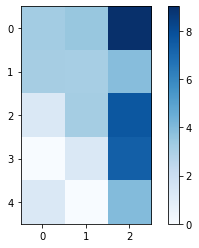

In [144]:
## unsymmetric
def calc_dist_matrix_1(res_obj1, res_obj2):
    dist = np.zeros((len(res_obj1), len(res_obj2)))
    # for x in res_obj:
    #     print(x.getCoords()[0][0], type(x.getCoords()[0][0]))
    atomcoords1 = np.array([x.getCoords() for x in res_obj1])
    atomcoords2 = np.array([x.getCoords() for x in res_obj2])
    for i,res1 in enumerate(atomcoords1):
        for j,res2 in enumerate(atomcoords2):
            print(i,j)
            value = []
            for atom1 in res1:
                for atom2 in res2:
                    value.append(getDistance(atom1, atom2))
    #         print(value)
            dist[i,j] = np.min(value)
    return(dist)

# %timeit dist_1 = calc_dist_matrix_1(res_obj1, res_obj2)
dist_1 = calc_dist_matrix_1(res_obj_1, res_obj_2)
np_plot(dist_1)

In [170]:
for x in res_obj_1[0].select('not backbone'):
    print(x)

Atom CB (index 8)
Atom OG (index 9)


0 0
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 1
[0 0]
[[ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 2
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 3
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
1 1
[[ 14.271  -7.337 -32.683]
 [ 13.109  -8.043 -33.233]
 [ 13.142  -8.341 -34.734]
 [ 12.505  -9.293 -35.192]
 [ 11.818  -7.319 -32.861]
 [ 11.448  -7.472 -31.394]
 [ 11.378  -9.197 -30.858]
 [ 10.019  -9.813 -31.853]]
1 2
[1 1 1 1]
[[ 11.818  -7.319 -32.861]
 [ 11.448  -7.472 -31.394]
 [ 11.378  -9.197 -30.858]
 [ 10.019  -9.813 -31.853]]
1 3
[[ 14.271  -7.337 -32.683]
 [ 13.109  -8.043 -33.233]
 [ 13.142  -8.341 -34.734]
 [ 12

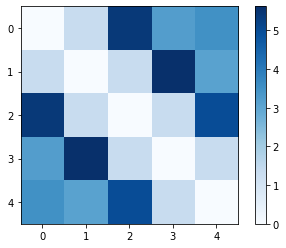

In [176]:
def calc_dist_matrix_sym(res_obj1, res_obj2):
    dist = np.zeros((len(res_obj1), len(res_obj2)))
    # for x in res_obj:
    #     print(x.getCoords()[0][0], type(x.getCoords()[0][0]))
    atomcoords1 = np.array([x.getCoords() for x in res_obj1])
    atomcoords2 = np.array([x.getCoords() for x in res_obj2])
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords[i+1:]):
            j_1 = i + j
            value = []
            res1_t = res1
            res2_t = res2
            print(i,j_1)
            if j_1-i==1:
                print(np.array([x.getResnum() for x in res_obj1[i].select('not backbone')]))
                res1_t = np.array([x.getCoords() for x in res_obj1[i].select('not backbone')])
                res2_t = np.array([x.getCoords() for x in res_obj2[j_1].select('not backbone')])
            print(res1_t)
            for atom1 in res1_t:
                for atom2 in res2_t:
                    value.append(getDistance(atom1, atom2))
    #         print(value)
            dist[i,j_1+1] = dist[j_1+1,i] = np.min(value)
    return(dist)

# %timeit dist_1 = calc_dist_matrix_1(res_obj1, res_obj2)
dist_1 = calc_dist_matrix_sym(res_obj_1, res_obj_1)
np_plot(dist_1)

In [146]:
x = None
if x and x < None:
    print ('x')

In [179]:
ca1 = np.array([13.109, -8.043, -33.233])
ca2 = np.array([13.977,  -7.732, -36.932])
print (getDistance(ca1,ca2))

3.81218388853424


In [181]:
ca8 = np.array([3.179, -19.708, -34.272])
ca9 = np.array([1.459, -18.878, -30.969])
print (getDistance(ca8,ca9))

3.815377962928441


In [198]:
structure_ca = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
res_list_here = [8,274]
hv = structure.getHierView()
chain = 'A'
ca_atoms = np.array(hv['A'])[res_list_here]

for atom in ca_atoms:
    print(atom.getResnum())
print (buildDistMatrix(ca_atoms))

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.08s.


7
276


ValueError: one and two must have shape ([M,]N,3)

In [332]:
# structure = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
def select_res_1(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    ca_atoms = np.array(hv[chain].select("resnum %s and ca"%" ".join([str(x) for x in select])))
    for atom in ca_atoms:
        print(atom, atom.getResnum())
    return(ca_atoms)
#     print (buildDistMatrix(ca_atoms))

def select_res_2(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    atoms = np.array(hv[chain])[select]
    for atom in atoms:
        print(atom, type(atom))
    return(atoms)

def select_res_3(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    print(type(hv[chain]))
    atoms = np.array(hv[chain].select("resnum %s and ca"%" ".join([str(x) for x in select])))
    print(type(atoms), atoms.shape)
    for atom in atoms:
        print(atom, atom.getResnum(), type(atom)) #.getResnum())
    return(atoms)
#     print (buildDistMatrix(ca_atoms))

def select_res_4(file, chain, select):
    atoms = pdbfile.parsePDB(file, chain=chain, subset = 'ca') #resnum %s'%" ".join([str(x) for x in select]))
#     atoms = np.array(hv[chain].select("resnum %s"%" ".join([str(x) for x in select])))
    print(type(atoms))
    for atom in atoms:
        print(atom, atom.getResnum(), type(atom))
    return(atoms)
#     print (buildDistMatrix(ca_atoms))

In [333]:
file = './datafiles/pdb_files/4EOQ.pdb'
chain = 'A'
select = [8, 274]
# select = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]

# select_res_1(file, chain, select)
# klifs_ident_2 = select_res_2(file, chain, select)
klifs_ident_3 = select_res_3(file, chain, select)
# klifs_ident_4 = select_res_4(file, chain, select)
# select = [240]
# %timeit select_res_1(file, chain, select)
# %timeit select_res_2(file, chain, select)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.08s.


<class 'prody.atomic.chain.Chain'>
<class 'numpy.ndarray'> (2,)
Atom CA (index 72) 8 <class 'prody.atomic.atom.Atom'>
Atom CA (index 2189) 274 <class 'prody.atomic.atom.Atom'>


In [318]:
np_plot(buildDistMatrix(klifs_ident_3))

ValueError: one and two must have shape ([M,]N,3)

In [232]:
select = [40]
select_res_1(file, chain, select)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.09s.


TypeError: iteration over a 0-d array

## testing PCA

In [85]:
DIST_MAT_DIR_REF = './datafiles/npy_files/ref/'
npy_files = glob.glob(DIST_MAT_DIR+"*.npy")
dist_mats_calc = []
for file in npy_files:
    print(file)
    dist_mat = np.load(file)
    dist_mats_calc.append(dist_mat)
print(dist_mats_calc[0][0])

ref_npy_files = glob.glob(DIST_MAT_DIR_REF+"*.npy")
dist_mats_ref = []
for file in ref_npy_files:
    print(file)
    dist_mat = np.load(file)
    dist_mats_ref.append(dist_mat)
print(dist_mats_ref[0][0])

./datafiles/npy_files/calc/2VU3_A.npy
./datafiles/npy_files/calc/4EOQ_A.npy
./datafiles/npy_files/calc/4EOQ_C.npy
./datafiles/npy_files/calc/6GUE_A.npy
./datafiles/npy_files/calc/6GUE_C.npy
[ 0.          5.50461025  3.59717959  6.28319648  9.43363228 12.21764634
 15.74182639 15.10016126 11.43221112  8.14445836  4.64448146  3.36561985
  2.7725766   7.14476935  7.71201588  7.23957547  9.443689   10.33136627
 13.48744027  0.         26.6382716  23.33807049 24.06840903 25.99443506
 24.14515123 19.91653808 23.63725807 25.06143414 19.4171271  21.07671552
 24.58584916 23.28874481 22.62967293 22.44361401 22.17257928 19.74247219
 14.79761423 15.87347325 16.48435055 14.57425298 15.94052298 17.78776765
 11.52568167 11.47562783 12.47325683 11.56440478 12.23875557  6.74217865
  9.96335661  8.64892288 10.9953085  11.77536267 15.82695407 16.06228471
 10.0000138  15.6178132  18.33517025 16.43053846 16.86579441 26.61828443
 27.32927934 25.77156582 29.62640878 32.73277112 30.7716896  30.87668488
 26.095

In [55]:
import glob
from scipy import linalg as LA
from sklearn import decomposition
import dist_analy.pca

DIST_MAT_DIR = './datafiles/npy_files/calc/'
CDK2_KLIFS_IDENT = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]

triu_ind = np.triu_indices(len(CDK2_KLIFS_IDENT),k=1)

npy_files = glob.glob(DIST_MAT_DIR+"*.npy")
feats_list = []
dist_mats = []
for file in npy_files:
    dist_mat = np.load(file)
    dist_mats.append(dist_mat)
dist_mats, res_list, ind_list = dist_analy.pca.remove_missing(dist_mats, CDK2_KLIFS_IDENT)
feats_list = dist_analy.pca.triu_flatten(dist_mats, res_list)


100 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 262, 274]


In [56]:
# %%timeit
npy_pca = decomposition.PCA()
npy_pca.fit(feats_list)

1.02 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


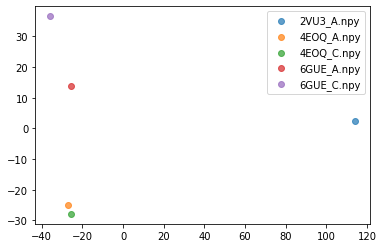

In [57]:
# print(npy_pca.components_.shape, feats_list.shape)
# print(npy_pca.explained_variance_ratio_)
# print(len(triu_ind[0]))
feats_list -= np.mean(feats_list, axis=0)
a = np.dot(feats_list, npy_pca.components_.T)
ax = plt.axes()
for dp, file in zip(a, npy_files):
    ax.scatter(dp[0], dp[1], label=file.split('/')[-1], alpha=0.7)
plt.legend()

In [65]:
def np_plot(array):
    fig, ax = plt.subplots()
    im = ax.imshow(array, cmap="Blues")
    cbar = ax.figure.colorbar(im,ax=ax)

15


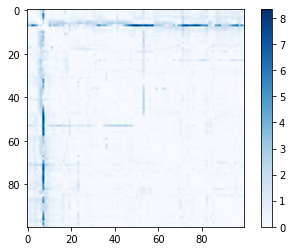

In [70]:
# print(dist_mats[3].shape, dist_mats[4].shape)
abs_diff = np.abs(np.subtract(dist_mats[1], dist_mats[3]))
np_plot(abs_diff)

for i,row in enumerate(abs_diff):
    if np.average(row) > 2.2:
        print(res_list[i])

In [66]:
# %%timeit
# R = np.cov(feats_list, rowvar=False)
# evals , evecs = LA.eigh(R)
# idx = np.argsort(evals)[::-1]
# evecs = evecs[:,idx]
# evals = evals[idx]

40.3 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
# R = np.cov(feats_list, rowvar=False)
# evals , evecs = LA.eigh(R)
# idx = np.argsort(evals)[::-1]
# evecs = evecs[:,idx]
# evals = evals[idx]

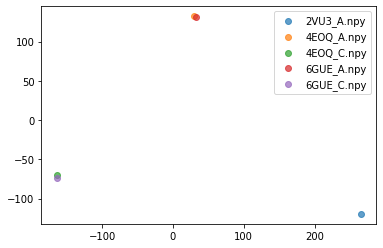

In [73]:
# feats_list -= np.mean(feats_list, axis=0)
# a = np.dot(feats_list, evecs)
# ax = plt.axes()
# for dp, file in zip(a, npy_files):
#     ax.scatter(-dp[0], -dp[1], label=file.split('/')[-1], alpha=0.7)
# plt.legend()

In [4]:
from dist_analy.dist_analy import get_shortest_dist_matrix
from dist_analy.import_pdb import get_any_info, process_pdb
from sklearn import decomposition
import dist_analy.pca

PDB_DIR = './datafiles/pdb_files/testing/'
OUTPATH = './datafiles/pdb_files/processed_pdb/'
SAVE_NPY = './datafiles/npy_files/calc/'
# TEST_PDB_LIST = ['2VU3.pdb', '5OO0.pdb']
MULTIPLE_CHAIN_PDB = ['4EOQ.pdb', '6GUE.pdb', '2VU3.pdb']
UNIPROT_CDK2 = 'P24941'

CDK2_KLIFS_IDENT = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]


chain_list = ['A', 'C']
dist_mat_list = []
dist_mat_pdb = []
for pdb_fn in MULTIPLE_CHAIN_PDB:
    pdb_list = process_pdb(pdb_fn, PDB_DIR, OUTPATH, UNIPROT_CDK2)
    for proc in pdb_list:
        pdb = proc.split('.')[0]
        chain = proc.split(".")[0].split("_")[-1]
        print(OUTPATH+proc, chain)
        dist_mat = get_shortest_dist_matrix(OUTPATH+proc, CDK2_KLIFS_IDENT, chain)
        dist_mat_list.append(dist_mat)
        dist_mat_pdb.append(pdb)
    
# dist_mats, res_list, ind_list = dist_analy.pca.remove_missing(dist_mat_list, CDK2_KLIFS_IDENT)
# feats_list = dist_analy.pca.triu_flatten(dist_mats, res_list)
# print("PCA")
# npy_pca = decomposition.PCA()
# npy_pca.fit(feats_list)

# 

#         save(SAVE_NPY+pdb+".npy", dist_mat)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18328.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18360.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18367.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18398.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinu

./datafiles/pdb_files/processed_pdb/4EOQ_A.pdb A


@> 2210 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/pdb_files/processed_pdb/4EOQ_C.pdb C


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9563.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9589.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9615.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9794.
  PDBConstructionWarning,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous 

./datafiles/pdb_files/processed_pdb/6GUE_A.pdb A


@> 2321 atoms and 1 coordinate set(s) were parsed in 0.02s.


./datafiles/pdb_files/processed_pdb/6GUE_C.pdb C


@> 2305 atoms and 1 coordinate set(s) were parsed in 0.03s.


./datafiles/pdb_files/processed_pdb/2VU3_A.pdb A


100 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 262, 274]
3
PCA
link_cols
dendrogram
plot PCA
cluster size: 2 g
cluster size: 2 r
cluster size: 1 #808080
cluster size: 0 c
[0.76982568 0.13869821]


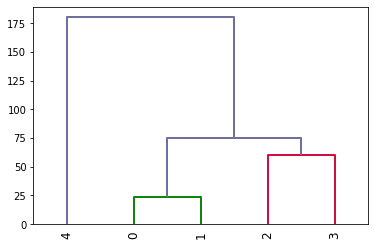

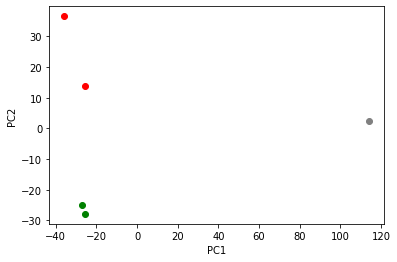

In [5]:
dist_mat_list = np.array(dist_mat_list)
dist_mats, res_list, ind_list, inds_fc, medoid_ind_list = dist_analy.pca.run(dist_mat_list, CDK2_KLIFS_IDENT)

In [31]:
print(np.array([feats[x] for x in inds_fc[c1] + inds_fc[c2]]).shape)
print(len(res_list))

(4, 4950)
100


In [28]:
for i,ind in enumerate(inds_fc):
    for x in ind:
        print (i,dist_mat_pdb[x])

0 4EOQ_A
0 4EOQ_C
1 6GUE_A
1 6GUE_C
2 2VU3_A


In [56]:
print(feats[:,1840])
val1 = np.divide(np.subtract(np.average(feats[inds_fc[c1], 1840]), np.average(feats[inds_fc[c2], 1840])), np.sqrt(np.multiply(np.std(feats[inds_fc[c1], 1840], axis=0),np.std(feats[inds_fc[c2], 1840], axis=0))))
print(np.divide(val1, (np.subtract(np.amin(feats[:,1840]),1.5))))


[15.87212327 15.8720304  14.91839713 14.91820428 19.36394113]
1062.282257826491


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3
A48-K129: 14.918, 1062.282

K33-Y77: 3.284, 48.489

F80-D145: 6.051, 47.171

L78-D145: 8.221, 43.282

V18-E81: 8.003, 42.873

L128-R169: 6.627, -34.313

L83-I135: 3.748, -34.039

L128-I192: 2.658, 32.002

V18-V30: 6.856, 31.967

G16-D185: 20.265, 30.396

[(20, 71, 1840, 1062.282257826491), (16, 41, 1488, 48.489375694675175), (44, 82, 3447, 47.170879467882486), (42, 82, 3336, 43.28195426863622), (10, 45, 979, 42.87329287475989), (70, 89, 4533, -34.31342495649692), (47, 77, 3601, -34.03898597548661), (70, 95, 4539, 32.0020094132664), (10, 13, 947, 31.9674521370088), (8, 92, 847, 30.395852565128042)]


/Users/echen10/Desktop/programs/dist_analy/dist_analy/pca.py:353: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.multiply(std_feats_c1, std_feats_c2)))


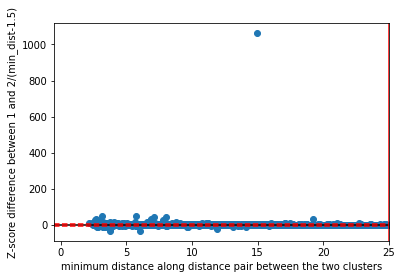

In [45]:
%load_ext autoreload
%autoreload 2

import dist_analy.pca
c1 = 0
c2 = 1

feats = dist_analy.pca.triu_flatten(dist_mats, res_list)
uniprot_sequence = 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL'

zscore, min_dist = dist_analy.pca.calc_cluster_zscore(inds_fc[c1], inds_fc[c2], feats)
dist_analy.pca.plot_zscore(c1, c2, feats, min_dist, zscore, res_list, uniprot_sequence, xcutoff=25)

[[  0.           1.          23.32296937   2.        ]
 [  2.           3.          60.42729169   2.        ]
 [  5.           6.          75.33122122   4.        ]
 [  4.           7.         180.25167405   5.        ]]
['4', '0', '1', '2', '3']
[4, 0, 1, 2, 3]


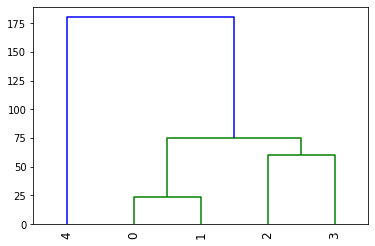

In [41]:
import scipy.cluster.hierarchy as sch
k=2
Z = sch.linkage(feats_list,method='ward')
fc = sch.fcluster(Z,t=k,criterion='maxclust')
ct=Z[-(k-1),2]
R = sch.dendrogram(Z, no_plot=False, leaf_rotation=90., color_threshold=ct)
print(Z)
print(R['ivl'])
ind_map = [int(x) for x in R['ivl']]
print(ind_map)

In [37]:
print(fc)
print(dist_analy.pca.get_indices(fc,ind_map,[1]))

[1 1 1 1 2]
[]


In [42]:
for i,inv in enumerate(ind_map):
    print(inv)

4
0
1
2
3
